In [1]:
#%load_ext rpy2.ipython
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from random import seed, gauss, randint
import csv
seed(1)
pd.options.plotting.backend = "plotly"

In [ ]:
%%R
library(tidyverse)
library(ggthemes)
colours = c('red3', 'deepskyblue', 'orange')

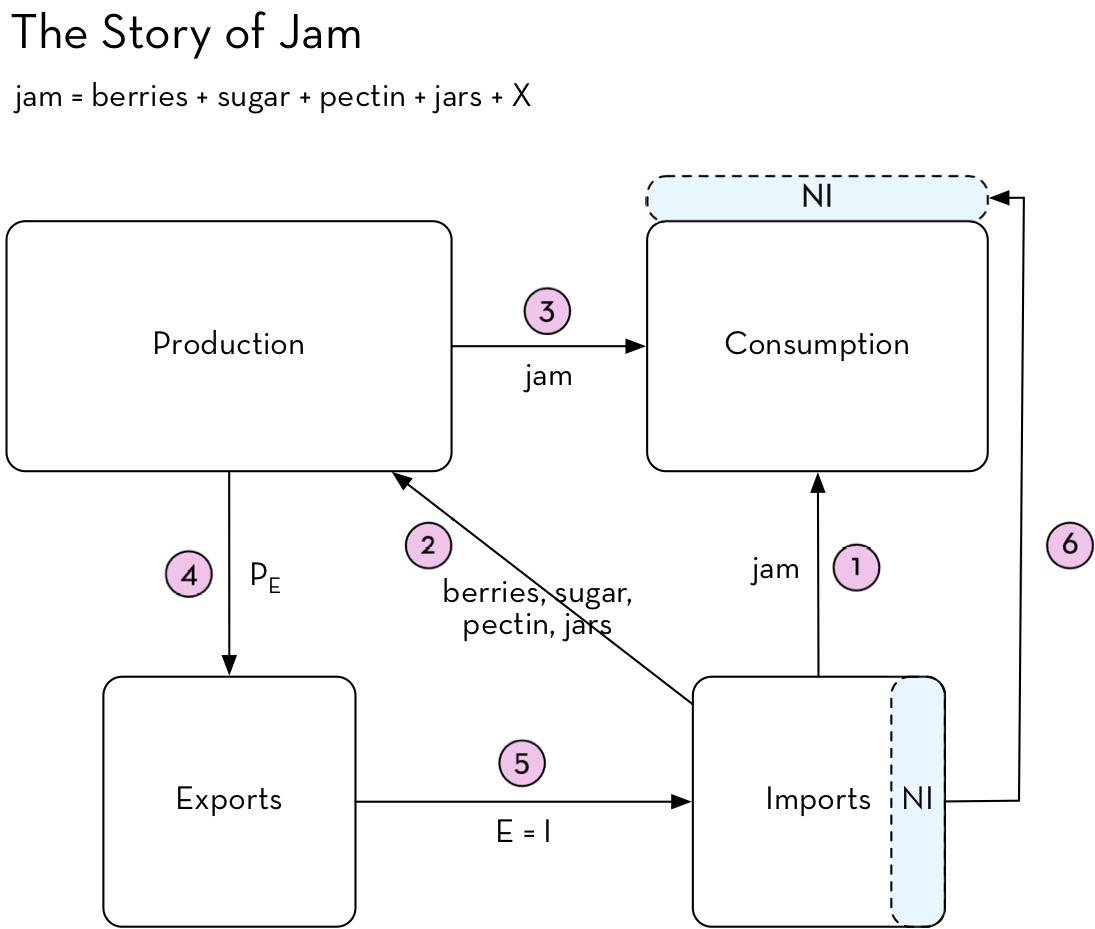

Step 1. $C = jam.$

Step 2. $\frac{dI}{dt} = -X = -\rho_C I$ where $\rho_C$ is a consumption import rate of replacement, $\frac{dC}{dt} = -jam$, $\frac{dP}{dt} = jam - X + X$, and production diversity, $\delta_P,$ increases.

Step 3. $\frac{dP}{dt} = -jam$, $\frac{dC}{dt} = jam.$

Step 4. $\frac{dE}{dt} = 0.$

Step 5. $\frac{dI}{dt} = NI$, $I = E$, so $NI = \rho_CI.$

Step 6. $\frac{dC}{dt} = NI =\rho_{C}I_{C}$
and consumption diversity, $\delta_C,$ increases.

The rate of consumption import replacement is described as a ratio of the consumption import diversity and the quantity of consumption, $\rho_C = \frac{\delta_C}{C}.$

Both consumption and production diversity increase by a percentage of the replaced imports determined by the factors $\alpha$ and $\beta$, respectively, such that $\frac{d\delta_{C}}{dt} = \alpha\frac{dC}{dt}$ and $\frac{d\delta_{P}}{dt} = \beta\frac{dC}{dt}.$

In summary, the net change to the system via consumption import replacement is:
change in consumption quantity is
\begin{equation} 
\frac{dC}{dt} = \rho_{C}I_{C},
\end{equation}
change in consumption diversity is
\begin{equation}
\frac{d\delta_{C}}{dt} = \alpha\frac{dC}{dt},
\end{equation}
and change in production diversity is
\begin{equation}
\frac{d\delta_{P}}{dt} = \beta\frac{dC}{dt}.
\end{equation}

In [2]:
def deriv(y, t, I, P, alpha, beta):
    print("Time: {}".format(t))
    C, delta_C, delta_P = y
    print(C)
    rho_C = delta_C / C
    dCdt = rho_C * I
    ddelta_Pdt = beta * dCdt
    ddelta_Cdt = alpha * dCdt
    return dCdt, ddelta_Cdt, ddelta_Pdt

t = np.linspace(1, 10, 10)

y0 = 10, 1, 0
I, P = 10, 10
alpha, beta = .1, .2
ret = odeint(deriv, y0, t, args = (I, P, alpha, beta))
C, delta_C, delta_P = ret.T


jam_results = pd.DataFrame({'t': t, 'I': I, 'C': C, 'P':P, 'delta_C':delta_C, 'delta_P':delta_P})
print(count)
print(jam_results)

Time: 1.0
10.0
Time: 1.0002266791747731
10.000226679174773
Time: 1.0004533583495463
10.000453358349546
Time: 3.267245106081615
12.267245106081614
Time: 5.534036853813683
14.534036853813681
Time: 7.800828601545752
16.80082860154575
Time: 30.468746078866438
39.468746078866445


NameError: name 'count' is not defined

In [7]:
exclude = ['t', 'I']
jam_results.loc[:, jam_results.columns.difference(exclude)].plot().show() 

In [ ]:
%%R -i jam_results
jam_results %>% gather(measure, value, -t) %>% 
    mutate(measure = fct_relevel(measure, 'I', 'C', 'P', 'delta_C', 'delta_P')) %>% filter(measure != 'I') %>%
    ggplot(aes(x = t, y = value, color = measure)) + theme_tufte() + geom_line(size = 1) +
    scale_color_brewer(palette = 'Paired')

In [8]:
## Jam

C=10
delta_C=1
delta_P=0
time=10
alpha = .1
beta = .2
I = 10
P = 10
results = []
current_day = 0

while current_day <= time:
    day_results = {
        'I': I,
        'C': C,
        'P': P,
        'delta_C': delta_C,
        'delta_P': delta_P,
    }
    rho_C = delta_C / C
    dCdt = rho_C * I
    old_C = C
    C += dCdt
    #delta_C = round(C, 1) - round(old_C, 1) ??
    ddelta_Pdt = beta * dCdt
    delta_P += ddelta_Pdt
    ddelta_Cdt = alpha * dCdt
    delta_C += ddelta_Cdt
    results.append(day_results)
    current_day += 1
df = pd.DataFrame(results)
print(df)

     I     C   P  delta_C  delta_P
0   10  10.0  10      1.0      0.0
1   10  11.0  10      1.1      0.2
2   10  12.0  10      1.2      0.4
3   10  13.0  10      1.3      0.6
4   10  14.0  10      1.4      0.8
5   10  15.0  10      1.5      1.0
6   10  16.0  10      1.6      1.2
7   10  17.0  10      1.7      1.4
8   10  18.0  10      1.8      1.6
9   10  19.0  10      1.9      1.8
10  10  20.0  10      2.0      2.0


In [ ]:
%R jam_results

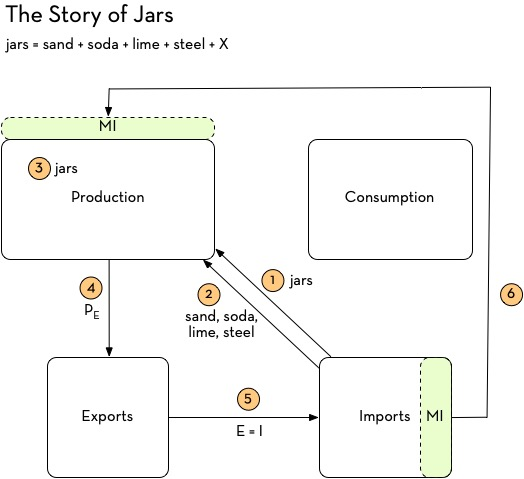

Step 1. $P = jars.$

Step 2. $\frac{dI}{dt} = -X = -\rho_PI$ where $\rho_P$ is a consumption import rate of replacement, $\frac{dP}{dt} = -jars + (jars - X) + X$ and production diversity, $\delta_P$, increases.

Step 3. $\frac{dP}{dt} = 0.$

Step 4. $\frac{dE}{dt} = 0.$

Step 5. $\frac{dI}{dt} = MI$, $I = E$, so $MI = \rho_PI.$

Step 6. $\frac{dP}{dt} = MI = \rho_PI_P.$

The rate of production import replacement is described as a ratio of the production import diversity and the quantity of production, $\rho_P = \frac{\delta_P}{P}.$

Production diversity increase by a percentage of the replaced imports determined by the factor $\beta$ such that $\frac{d\delta_P}{dt} = \beta\frac{dP}{dt}.$

In summary, the net change after all the steps, is 
change in production is
\begin{equation}
\frac{dP}{dt} = +MI =\rho_PI
\end{equation}
and the change in production diversity is
\begin{equation}
\frac{d\delta_{P}}{dt} = \beta\frac{dP}{dt}.
\end{equation}

In [7]:
def deriv(y, t, I, beta):
    print("Time: {}".format(t))
    P, delta_P = y
    print(P)
    rho_P = delta_P / P
    dPdt = rho_P * I
    ddelta_Pdt = beta * dPdt
    return dPdt, ddelta_Pdt

t = np.linspace(1, 10, 10)

y0 = 10, 1
I, C = 10, 10
delta_C = 1
beta = .2
ret = odeint(deriv, y0, t, args = (I, beta))
P, delta_P = ret.T

jars_results = pd.DataFrame({'t': t, 'I': I, 'C': C, 'P':P, 'delta_C':delta_C, 'delta_P':delta_P})
print(jars_results)

Time: 1.0
10.0
Time: 1.0002393998907524
10.000239399890752
Time: 1.0002393998907524
10.000239405621846
Time: 1.0004787997815048
10.000478811243966
Time: 1.0004787997815048
10.000478816974923
Time: 1.0407103860920366
10.040793256639232
Time: 1.0407103860920366
10.040793091904192
Time: 1.0809419724025684
10.081268890226939
Time: 1.0809419724025684
10.081268563998233
Time: 1.1211735587131002
10.121904905431759
Time: 1.1211735587131002
10.121904577992085
Time: 1.2997744972243366
10.304225669490018
Time: 1.2997744972243366
10.304222896332163
Time: 1.2487648485461036
10.251834752084976
Time: 1.2487648485461036
10.251833353204217
Time: 1.3763561383791072
10.38334754255413
Time: 1.3763561383791072
10.383348826768135
Time: 1.5039474282121108
10.516430089123691
Time: 1.5039474282121108
10.51643002282658
Time: 1.6315387180451144
10.651055533897138
Time: 1.6315387180451144
10.651055481559693
Time: 1.8867212977111214
10.92485311812997
Time: 1.8867212977111214
10.92485300075777
Time: 2.1419038773771

In [ ]:
%%R -i jars_results
jars_results %>% gather(measure, value, -t) %>% 
    mutate(measure = fct_relevel(measure, 'I', 'C', 'P', 'delta_C', 'delta_P')) %>% filter(measure != 'I') %>%
    ggplot(aes(x = t, y = value, color = measure)) + theme_tufte() + geom_line(size = 1) +
    scale_color_brewer(palette = 'Paired')

In [9]:
exclude = ['t', 'I']
jars_results.loc[:, jars_results.columns.difference(exclude)].plot().show() 

In [5]:
## Jars

C=10.0
delta_C=1.0
delta_P=1.0
time=10.0
alpha = .1
beta = .2
I = 10.0
P = 10.0
results = []
current_day = 0
ddelta_Pdt = 0

while current_day <= time:
    day_results = {
        'I': I,
        'C': C,
        'P': P,
        'delta_C': delta_C,
        'delta P': delta_P
    }
    rho_P = delta_P / P
    dPdt = rho_P * I
    ddelta_Pdt = beta * dPdt
    delta_P += ddelta_Pdt
    print('P before: {}'.format(P))
    print('dPdt: {}'.format(dPdt))
    P += dPdt
    print('P after: {}'.format(P))
    results.append(day_results)
    current_day += 1
df = pd.DataFrame(results)
print(df)

P before: 10.0
dPdt: 1.0
P after: 11.0
P before: 11.0
dPdt: 1.0909090909090908
P after: 12.09090909090909
P before: 12.09090909090909
dPdt: 1.1729323308270678
P after: 13.263841421736158
P before: 13.263841421736158
dPdt: 1.2460706003607318
P after: 14.50991202209689
P before: 14.50991202209689
dPdt: 1.3108159453502424
P after: 15.820727967447132
P before: 15.820727967447132
dPdt: 1.3679178340860116
P after: 17.188645801533145
P before: 17.188645801533145
dPdt: 1.4182206023985877
P after: 18.606866403931733
P before: 18.606866403931733
dPdt: 1.4625639920816036
P after: 20.069430396013335
P before: 20.069430396013335
dPdt: 1.5017297550215263
P after: 21.57116015103486
P before: 21.57116015103486
dPdt: 1.5364180725569252
P after: 23.107578223591787
P before: 23.107578223591787
dPdt: 1.5672415385446818
P after: 24.67481976213647
       I     C          P  delta_C   delta P
0   10.0  10.0  10.000000      1.0  1.000000
1   10.0  10.0  11.000000      1.0  1.200000
2   10.0  10.0  12.090909  

In [27]:
%R jars_results

UsageError: Line magic function `%R` not found.


In [11]:
exclude = ['t', 'I']
df.loc[:, df.columns.difference(exclude)].plot().show() 

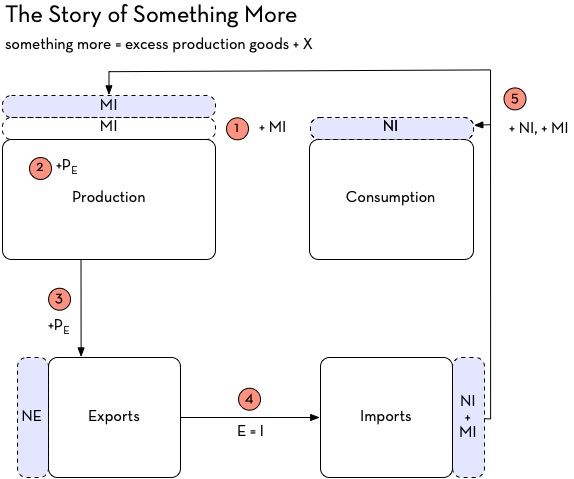

Step 1. $P_t = P_{t-1} + MI_{t-1}.$

Step 2. $\frac{dP}{dt} = MI_{t-1} + X = MI_{t-1}(1 + \nu_M)$ where $X = \nu_M MI_{t-1}.$

Step 3. $\frac{dE}{dt} = MI_{t-1}(1 + \nu_M) = NE.$

and production diversity, $\delta_P,$ increases.

Step 4. $\frac{dE}{dt} = \frac{dI}{dt} = MI_{t-1}(1 + \nu_M),$ $NE = NI_t + MI_t.$ We futher assume that $NI_t$ and $MI_t$ are split proportionately according to the relative sizes of $C$ and $P$ such that $NI = \frac{C}{C + P}$ and $MI = \frac{P}{C + P}.$

Step 5. $\frac{dC}{dt} = \frac{C}{C + P}MI_{t-1}(1 + \nu_M)$, $\frac{dP}{dt} = \frac{P}{C + P}MI_{t-1}(1 + \nu_M).$

In summary, the net system change after all the steps, 
the change in consumption is
\begin{equation} 
\frac{dC}{dt} = \frac{C}{C + P}MI_{t-1}(1 + \nu_M),
\end{equation}
and the change in production is
\begin{equation} 
\frac{dP}{dt} = \frac{P}{C + P}MI_{t-1}(1 + \nu_M).
\end{equation}

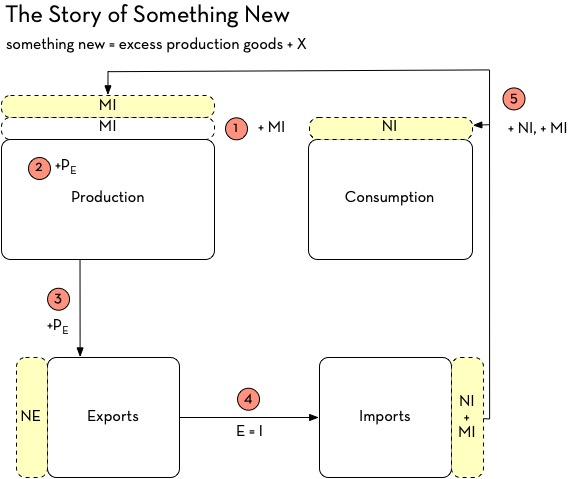

Something new will look a lot like something more except we'll use $\nu_N$ to represent the $X$ and production diversity will increase as well.

#### SIR Model Example
With $\beta$ the contact infection rate and $\gamma$ the recovery rate:

$\frac{dS}{dt} = -\frac{\beta SI}{N}$

$\frac{dI}{dt} = \frac{\beta SI}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

In [ ]:
N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = .2, 1/10
t = np.linspace(0, 150, 150)

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args = (N, beta, gamma))
S, I, R = ret.T
results = pd.DataFrame({'t': t, 'S': S, 'I': I, 'R':R})

In [20]:
## Something new
C=10
time=10
I = 10
P = 10
results = []
current_day = 0
mi = 5
vm = .3


while current_day <= time:
    old_MI = mi
    old_P  = P
    dPdt = (P/(C+P))*old_MI*(1+vm)
    dCdt = (C/(C+P))*old_MI*(1+vm)
    mi = P/(C+P)
    ni = C/(C+P)
    C += dCdt
    P += dPdt
    day_results = {
        'P': P,
        'C': C,
        'MI': mi,
        'dCDt': dCdt,
        'dPdt': dPdt
    }
    results.append(day_results)
    current_day += 1
df = pd.DataFrame(results)
print(df)



         P       C   MI   dCDt   dPdt
0   13.250  13.250  0.5  3.250  3.250
1   13.575  13.575  0.5  0.325  0.325
2   13.900  13.900  0.5  0.325  0.325
3   14.225  14.225  0.5  0.325  0.325
4   14.550  14.550  0.5  0.325  0.325
5   14.875  14.875  0.5  0.325  0.325
6   15.200  15.200  0.5  0.325  0.325
7   15.525  15.525  0.5  0.325  0.325
8   15.850  15.850  0.5  0.325  0.325
9   16.175  16.175  0.5  0.325  0.325
10  16.500  16.500  0.5  0.325  0.325


In [ ]:
%%R -i df
df %>% gather(measure, value, -t) %>% 
    mutate(measure = fct_relevel(measure, 'I', 'C', 'P', 'delta_C', 'delta_P')) %>% filter(measure != 'I') %>%
    ggplot(aes(x = t, y = value, color = measure)) + theme_tufte() + geom_line(size = 1) +
    scale_color_brewer(palette = 'Paired')

In [21]:
fig = df.plot(labels=dict(index="day", variable="Vars"))
fig.show()

In [ ]:
%%R -i results
results %>% gather(key, value, -t) %>% 
    ggplot(aes(x = t, y = value, color = key)) + theme_tufte() + geom_line(size = 1) +
    scale_color_manual(values = colours)

In [ ]:
results

In [19]:
## combined jars and jam

# delta p needs attention

C=10
delta_C=1
delta_P=1
time=10
alpha = .1
beta = .2
I = 10
P = 10
results = []
current_day = 0
rho_P = delta_P / P
dPdt = rho_P * I

while current_day <= time:
    rho_P = delta_P / P
    dPdt = rho_P * I
    P += dPdt
    rho_C = delta_C / C
    dCdt = rho_C * I
    ddelta_Pdt = (beta * dPdt) + (alpha * dCdt)
    delta_P += ddelta_Pdt
    C += dCdt
    delta_P += ddelta_Pdt
    ddelta_Cdt = alpha * dCdt
    delta_C += ddelta_Cdt
    day_results = {
        'I': I,
        'C': C,
        'P': P,
        'delta_C': delta_C,
        'delta_P': delta_P,
    }
    results.append(day_results)
    current_day += 1
df = pd.DataFrame(results)
print(df)


     I     C          P  delta_C    delta_P
0   10  11.0  11.000000      1.1   1.600000
1   10  12.0  12.454545      1.2   2.381818
2   10  13.0  14.366954      1.3   3.346782
3   10  14.0  16.696454      1.4   4.478582
4   10  15.0  19.378809      1.5   5.751524
5   10  16.0  22.346754      1.6   7.138702
6   10  17.0  25.541268      1.7   8.616507
7   10  18.0  28.914830      1.8  10.165932
8   10  19.0  32.430650      1.9  11.772260
9   10  20.0  36.060630      2.0  13.424252
10  10  21.0  39.783319      2.1  15.113328


In [17]:
fig = df.plot(labels=dict(index="day", variable="Vars"))
fig.show()